In [ ]:
!wget https://storage.googleapis.com/bl-scale/GBT_58064_63630_HIP75458_fine/filtered.npy

--2020-07-18 02:23:48--  https://storage.googleapis.com/bl-scale/GBT_58064_63630_HIP75458_fine/filtered.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1374224480 (1.3G) [application/octet-stream]
Saving to: ‘filtered.npy’

filtered.npy        100%[===================>]   1.28G  53.5MB/s    in 22s     

2020-07-18 02:24:11 (58.5 MB/s) - ‘filtered.npy’ saved [1374224480/1374224480]



In [ ]:
!wget https://storage.googleapis.com/bl-scale/GBT_58064_63630_HIP75458_fine/best_hits.npy

--2020-07-20 16:57:03--  https://storage.googleapis.com/bl-scale/GBT_58064_63630_HIP75458_fine/best_hits.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.28.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 393296 (384K) [application/octet-stream]
Saving to: ‘best_hits.npy’

best_hits.npy       100%[===================>] 384.08K  --.-KB/s    in 0.003s  

2020-07-20 16:57:03 (107 MB/s) - ‘best_hits.npy’ saved [393296/393296]



In [ ]:
import tensorflow as tf
import numpy as np
import time
import math

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
#from keras.layers import GlobalAveragePooling2D, Dense, Dropout,Activation,Flatten
#from keras.models import Model
#from keras.layers import Input
from keras.preprocessing import image
from keras.applications import resnet50
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import skimage
from skimage import transform
from PIL import Image
from matplotlib import cm
from cv2 import *

Using TensorFlow backend.


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
np_images = np.load('/content/filtered.npy', allow_pickle=True)
np_images.shape

(41938, 16, 256)

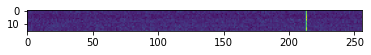

In [ ]:
plt.imshow(np_images[0], cmap='viridis')
plt.imsave(arr=np_images[0], cmap='viridis', format='png', fname='obs.png')
plt.imsave(arr=np_images[1], cmap='viridis', format='png', fname='obs1.png')

In [ ]:
model = ResNet50(weights='imagenet')

def npy_to_imgRGB(img):
    np_images_resized = skimage.transform.resize(image=img, output_shape = (224, 224))
    np_images_resized -= np.min(np_images_resized)
    np_images_resized = np_images_resized / np.max(np_images_resized)
    im = cv2.cvtColor(np.float32(np_images_resized),cv2.COLOR_GRAY2RGB)
    return im
np_images = tf.random.shuffle(np_images)
np_images = tf.reshape(np_images[:4000], (4000, 16*256))
np_images = tf.cast(np_images, dtype='uint8')

converted_ima = np.apply_along_axis(npy_to_imgRGB, 1, np_images)

# Scale the input image to the range used in the trained network
x = resnet50.preprocess_input(converted_ima)

# Run the image through the deep neural network to make a prediction
predictions = model.predict(x)

# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes = resnet50.decode_predictions(predictions, top=10)

print("This is an image of:")

for imagenet_id, name, likelihood in predicted_classes[0]:
    print(" - {}: {:2f} likelihood".format(name, likelihood))

This is an image of:
 - web_site: 0.054473 likelihood
 - nematode: 0.044038 likelihood
 - digital_clock: 0.037005 likelihood
 - television: 0.036862 likelihood
 - matchstick: 0.034256 likelihood
 - spotlight: 0.031002 likelihood
 - shoji: 0.026331 likelihood
 - monitor: 0.026261 likelihood
 - theater_curtain: 0.025199 likelihood
 - lampshade: 0.020012 likelihood
